<a href="https://colab.research.google.com/github/TanTheta11/TSF_GRIP_Internship/blob/main/ipl_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Exploratory Data Analysis - Sports
## - by Tanha Santhosh 
###(Level - Advanced)

 
 Goals: 

*   Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’
*   As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.
* Suggest teams or players a company should endorse for its products.
* Tool used - Python, Google Colaboratory
* Dataset: https://bit.ly/34SRn3b


In [2]:
#loading dataset
!unzip '/content/drive/MyDrive/IPL/Indian_Premier_League.zip'

Archive:  /content/drive/MyDrive/IPL/Indian_Premier_League.zip
  inflating: deliveries.csv          
  inflating: matches.csv             


In [91]:
#importing necessary libraries
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import collections
from collections import defaultdict

In [4]:
delivery_data = pd.read_csv('deliveries.csv')
delivery_data

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN


In [5]:
match_data = pd.read_csv('matches.csv')
match_data

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


##Data Cleaning

Let's analyse the dataset

We notice that: 
* **deliveries.csv** has 179078 rows and 21 columns
* **matches.csv** has 756 rows and 18 columns

Let's now check and handle the NULL values


In [6]:
#null entry count in matches.csv
match_data.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

Since **637** out of **756** (**84.26%**) of the entries are missing in the `umpire3` column, we will drop the column.

In [7]:
match_data.drop('umpire3', axis=1, inplace=True)
#"umpire3" column has been successfully dropped

Notice that `winner` and `player_of_match` have `NaN` values when a match doesn't have a result. Hence, it makes sense to replace the `Nan` values in both columns with `No Result`

In [8]:
match_data['winner'].fillna('No Result', inplace=True)
match_data['player_of_match'].fillna('No Result', inplace=True)

In [9]:
match_data[match_data['city'].isna()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus


As per statistics, the above have been held in Dubai International Cricket Stadium. Hence, it would make sense to replace the `NaN` values in this column to `Dubai`.  

In [10]:
match_data['city'].fillna('Dubai', inplace=True)

The 2 `NaN` values in `umpire1` and `umpire2` columns can be replaced by the value `Unknown`. 

In [11]:
match_data['umpire1'].fillna('Unknown', inplace=True)
match_data['umpire2'].fillna('Unknown', inplace=True)

Now, that all the `NaN` values have been dealt with, let's check the Null value count again 

In [12]:
match_data.isna().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

Now that `matches.csv` is clean, let's deal clean `deliveries.csv'



In [13]:
#null entry count in deliveries.csv
delivery_data.isna().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

Notice that, `player_dismissed` and `dismissal_kind` holds NaN values when the player isn't dismissed. Hence, it makes sense to replace the NaN values with `Not Out`.

In [270]:
deli_copy=delivery_data
delivery_data['player_dismissed'].fillna('Not Out', inplace=True)
delivery_data['dismissal_kind'].fillna('Not Out', inplace=True)

#checking for what can be filled in place of NaN values under 'fielder'
delivery_data[(delivery_data['dismissal_kind'] != 'Not Out') & (delivery_data['fielder'].isna() == False)]['dismissal_kind'].unique()

array(['caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

As seen in the above scenarios, it is preferable to replace the `NaN` values with `NA`

In [15]:
delivery_data['fielder'].fillna('NA', inplace=True)

Let's recheck for any more `NaN` values

In [16]:
delivery_data.isna().sum()

match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batsman             0
non_striker         0
bowler              0
is_super_over       0
wide_runs           0
bye_runs            0
legbye_runs         0
noball_runs         0
penalty_runs        0
batsman_runs        0
extra_runs          0
total_runs          0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64

Now we have cleaned both of our datasets.

Let's now fix any duplicate entries.

In [17]:
match_data['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [18]:
#'Deccan Chargers' later changed their name to 'Sunrisers Hyderabad
match_data.replace(to_replace="Deccan Chargers", value="Sunrisers Hyderabad", inplace=True)
delivery_data.replace(to_replace="Deccan Chargers", value="Sunrisers Hyderabad", inplace=True)

#eliminating duplicate
match_data.replace(to_replace="Rising Pune Supergiant", value="Rising Pune Supergiants", inplace=True) 
delivery_data.replace(to_replace="Rising Pune Supergiant", value="Rising Pune Supergiants", inplace=True)

#'Pune warriors' changed name to 'Rising Pune Supergiants' 
match_data.replace(to_replace="Pune Warriors", value="Rising Pune Supergiants", inplace=True) 
delivery_data.replace(to_replace="Pune Warriors", value="Rising Pune Supergiants", inplace=True) 

#'Delhi Daredevils' later changed their name to 'Delhi Capitals'
match_data.replace(to_replace="Delhi Daredevils", value="Delhi Capitals", inplace=True) 
delivery_data.replace(to_replace="Delhi Daredevils", value="Delhi Capitals", inplace=True) 

In [19]:
match_data['venue'].unique()

array(['Rajiv Gandhi International Stadium, Uppal',
       'Maharashtra Cricket Association Stadium',
       'Saurashtra Cricket Association Stadium', 'Holkar Cricket Stadium',
       'M Chinnaswamy Stadium', 'Wankhede Stadium', 'Eden Gardens',
       'Feroz Shah Kotla',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Green Park', 'Punjab Cricket Association Stadium, Mohali',
       'Sawai Mansingh Stadium', 'MA Chidambaram Stadium, Chepauk',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed V

In [20]:
#Merging similar name of stadiums into one
match_data.replace(to_replace="MA Chidambaram Stadium, Chepauk", value="M. A. Chidambaram Stadium", inplace=True) 
match_data.replace(to_replace="Punjab Cricket Association IS Bindra Stadium, Mohali", value="Punjab Cricket Association Stadium, Mohali", inplace=True) 
match_data.replace(to_replace="M Chinnaswamy Stadium", value="M. Chinnaswamy Stadium", inplace=True) 
match_data.replace(to_replace="ACA-VDCA Stadium", value="Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium", inplace=True) 
match_data.replace(to_replace="Rajiv Gandhi International Stadium, Uppal", value="Rajiv Gandhi International Stadium, Uppal", inplace=True)


Let's replace the team names in columns `team1`, `team2`, `toss_winner`, `batting_team`, `bowling_team` and `winner` by the team abbreviations for easy of understanding

In [21]:
abbr={'Royal Challengers Bangalore':'RCB', 'Sunrisers Hyderabad':'SRH',
       'Rising Pune Supergiants':'RPS', 'Mumbai Indians':'MI',
       'Kolkata Knight Riders':'KKR', 'Gujarat Lions':'GL', 'Kings XI Punjab':'KXIP',
       'Chennai Super Kings':'CSK', 'Rajasthan Royals':'RR',
       'Delhi Capitals':'DC', 'Kochi Tuskers Kerala':'KTK' 
}

match_data['team1']=match_data['team1'].map(abbr)
match_data['team2']=match_data['team2'].map(abbr)
match_data['toss_winner']=match_data['toss_winner'].map(abbr)
delivery_data['batting_team']=delivery_data['batting_team'].map(abbr)
match_data['winner']=match_data['winner'].map(abbr)
delivery_data['bowling_team']=delivery_data['bowling_team'].map(abbr)


In [22]:
print(match_data)
print(delivery_data)

        id  season  ...         umpire1         umpire2
0        1    2017  ...     AY Dandekar        NJ Llong
1        2    2017  ...  A Nand Kishore          S Ravi
2        3    2017  ...     Nitin Menon       CK Nandan
3        4    2017  ...    AK Chaudhary   C Shamshuddin
4        5    2017  ...         Unknown         Unknown
..     ...     ...  ...             ...             ...
751  11347    2019  ...   Nanda Kishore        O Nandan
752  11412    2019  ...     Nigel Llong     Nitin Menon
753  11413    2019  ...         Unknown         Unknown
754  11414    2019  ...   Sundaram Ravi  Bruce Oxenford
755  11415    2019  ...     Nitin Menon       Ian Gould

[756 rows x 17 columns]
        match_id  inning  ... dismissal_kind    fielder
0              1       1  ...        Not Out         NA
1              1       1  ...        Not Out         NA
2              1       1  ...        Not Out         NA
3              1       1  ...        Not Out         NA
4              1       

##Exploratory Analysis

###Most successful teams

In [23]:
match_data['winner'].value_counts() 

MI      109
CSK     100
KKR      92
SRH      87
RCB      84
KXIP     82
DC       77
RR       75
RPS      27
GL       13
KTK       6
Name: winner, dtype: int64

In [24]:
match_data.season.unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


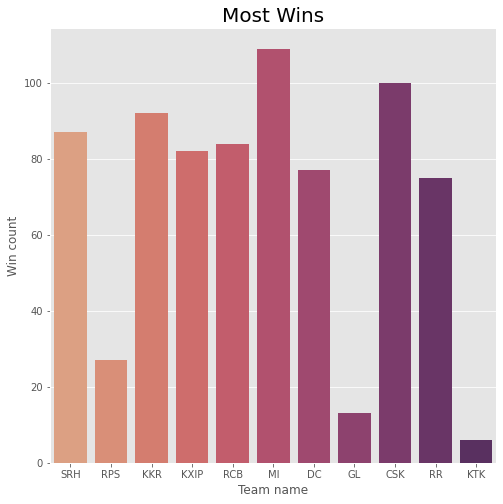

In [66]:
plt.figure(figsize=(8,8))
sns.countplot(match_data.winner,palette="flare");
plt.title("Most Wins",fontsize=20)
plt.ylabel("Win count")
plt.xlabel("Team name")
plt.show();

As seen above **Mumbai Indians** has been the most successful team with a total of **109 wins** from 2008 to 2019, closely followed by **Chennai Super Kings** and **Kolkata Knight Riders** with **100** and **92** wins respectively.

Let's now check which teams have made it the most to the finals

In [26]:
finals = match_data.drop_duplicates(subset=['season'], keep='last')
finals = finals[['id', 'season', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner']]

most_finals = pd.concat([finals['team1'], finals['team2']]).value_counts().reset_index()
most_finals.rename({'index':'team',0:'count'}, axis=1, inplace=True)
wins = finals['winner'].value_counts().reset_index()
most_finals=most_finals.merge(wins,left_on='team',right_on='index',how='outer')
most_finals=most_finals.replace(np.NaN,0)
most_finals.drop('index',axis=1,inplace=True)
most_finals.rename({'count':'finals_played','winner':'win_count'},inplace=True,axis=1)

most_finals

,team,finals_played,won_count
0,CSK,8,3.0
1,MI,5,4.0
2,RCB,3,0.0
3,SRH,3,2.0
4,KKR,2,2.0
5,KXIP,1,0.0
6,RPS,1,0.0
7,RR,1,1.0


####Maximum score in each season

In [28]:
match_list = []
total_innings = []
batting_team = []
runs = []

for match_no in delivery_data['match_id'].unique():
    for innings in delivery_data[ delivery_data['match_id']==match_no ]['inning'].unique():
        df = delivery_data[
                        (delivery_data['match_id']==match_no) &
                        (delivery_data['inning']==innings)
        ]
        total_runs = df['total_runs'].sum()
        runs.append(total_runs)
        match_list.append(match_no)
        total_innings.append(innings)
        batting_team.append(df['batting_team'].unique()[0])

In [30]:
df1 = pd.DataFrame()
df1['match_id'] = match_list
df1['total_runs'] = runs
df1['season'] = [match_data[match_data['id']==i]['season'].unique()[0] for i in match_list] 
df1['batting_team'] = batting_team

df1

,match_id,total_runs,season,batting_team
0,1,207,2017,SRH
1,1,172,2017,RCB
2,2,184,2017,MI
3,2,187,2017,RPS
4,3,183,2017,GL
...,...,...,...,...
1523,11413,170,2019,DC
1524,11414,155,2019,DC
1525,11414,162,2019,CSK
1526,11415,152,2019,MI


In [31]:
season = []
teamId = []
maxruns = []
for year in df1['season'].unique():
    max_run = df1[ df1['season']==year ]['total_runs'].max()
    team = df1[ (df1['season']==year) & (df1['total_runs']==max_run) ]['batting_team'].unique()[0]
    season.append(year)
    teamId.append(team)
    maxruns.append(max_run)

maxruns

[230, 240, 211, 246, 232, 222, 263, 231, 235, 248, 250, 241]

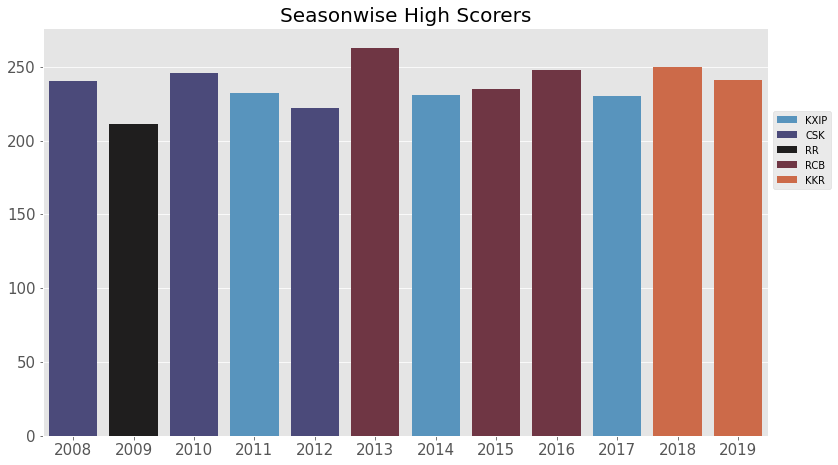

In [80]:
plt.style.use('ggplot')
fig=plt.gcf()
fig.set_size_inches(13,7.5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Seasonwise High Scorers",fontsize=20)
ax=sns.barplot(x = season, y = maxruns, hue = teamId, dodge=False, palette="icefire")
ax.legend(loc = 'center left', bbox_to_anchor=(1,0.7))
plt.show()

Above seasonwise bar graph depicts the top run scoring teams of each season.


*   **RCB** and **KKR** have consecutively been top scorers for 2 years
*   **CSK**, **KXIP**, **RCB** and **KKR** have tied to be top scorers of the season thrice. 



####Win percentage of IPL teams

In [49]:
teams=(match_data['team1'].value_counts()+match_data['team2'].value_counts()).reset_index()
teams.columns=['team_name','matches_played']
teams

,team_name,matches_played
0,CSK,164
1,DC,177
2,GL,30
3,KKR,178
4,KTK,14
5,KXIP,176
6,MI,187
7,RCB,180
8,RPS,76
9,RR,147


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


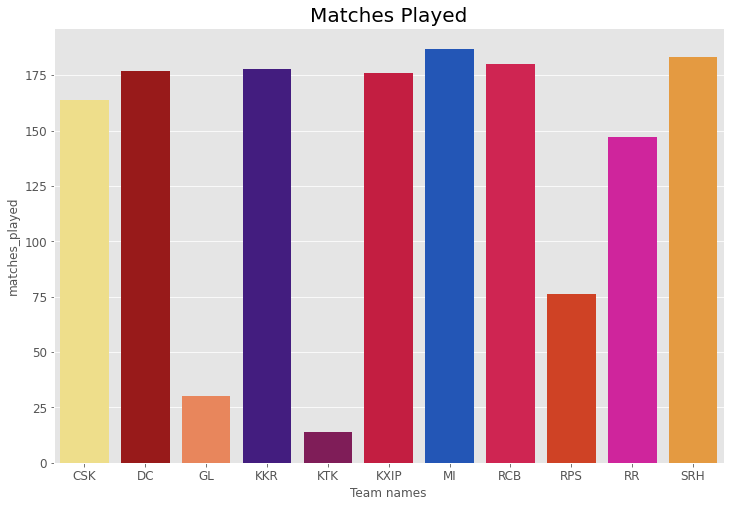

In [74]:
plt.figure(figsize=(12,8))
sns.barplot(teams.team_name,teams.matches_played, palette=["#ffe97a","#ad0505","#ff7d45","#3f0d8f","#8f0d5b","#de0232","#0a4fcf","#eb0945","#eb2f09","#eb09a7","#ff9d26"])
plt.title("Matches Played",fontsize=20);
plt.xlabel('Team names');
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show();

In [62]:
wins=match_data['winner'].value_counts().reset_index()
wins.columns=['team_name','wins']

player=teams.merge(wins,left_on='team_name',right_on='team_name',how='inner')
player['win_percent']=(player['wins']/player['matches_played'])*100
player = player.sort_values('win_percent', ascending=False)
player

,team_name,matches_played,wins,win_percent
0,CSK,164,100,60.975610
6,MI,187,109,58.288770
3,KKR,178,92,51.685393
9,RR,147,75,51.020408
10,SRH,183,87,47.540984
7,RCB,180,84,46.666667
5,KXIP,176,82,46.590909
1,DC,177,77,43.502825
2,GL,30,13,43.333333
4,KTK,14,6,42.857143


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


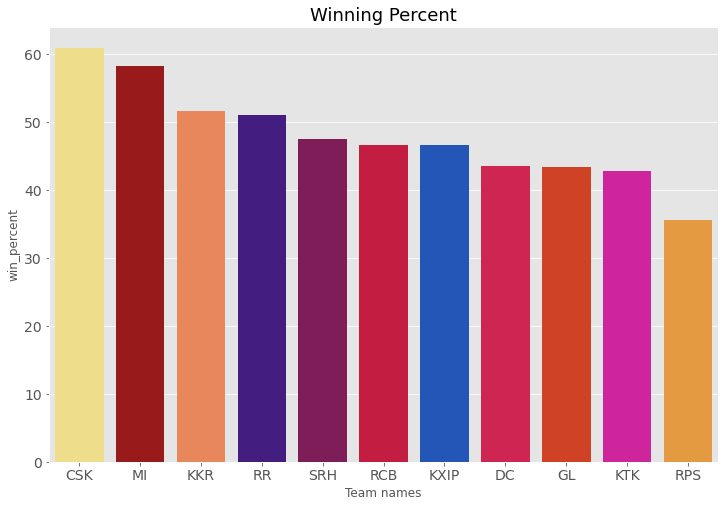

In [71]:
plt.figure(figsize=(12,8))
sns.barplot(player.team_name,player.win_percent, palette=["#ffe97a","#ad0505","#ff7d45","#3f0d8f","#8f0d5b","#de0232","#0a4fcf","#eb0945","#eb2f09","#eb09a7","#ff9d26"])
plt.title("Winning Percent", fontsize=18);
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Team names');

We observe that contradictory to the `Most Wins` graph, **Chennai Super Kings** leads in the `Winning Percent` graph closely followed by **Mumbai Indians** and **Kolkata Knight Riders**

###Successful Players

####Successful Batsman
Let's look at the following


*   Top 20 Players with highest number of Man-of-the-Match awards
*  Season wise distribution of Top 20 Man-of-the-Match award holders



In [87]:
#Most man of the match awards in IPL 
motm = pd.DataFrame()
motm['Awards']=match_data['player_of_match'].value_counts()
motm['Player'] =motm.index
motm=motm[:20]
motm.drop('Player',axis=1,inplace=False)

,Awards
CH Gayle,21
AB de Villiers,20
RG Sharma,17
MS Dhoni,17
DA Warner,17
YK Pathan,16
SR Watson,15
SK Raina,14
G Gambhir,13
V Kohli,12


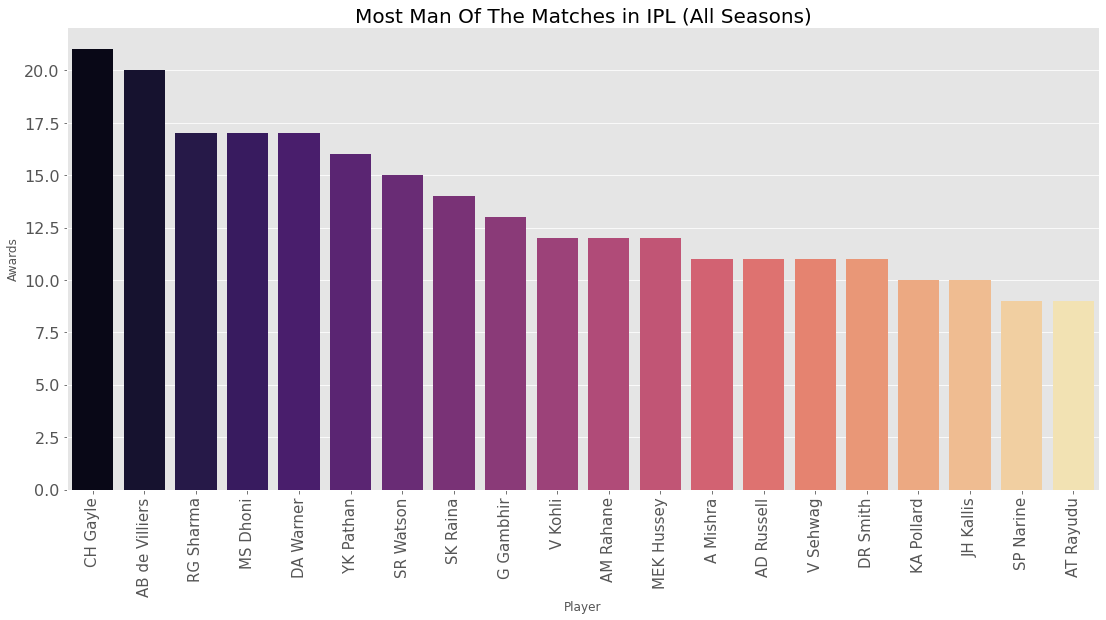

In [89]:
plt.style.use('ggplot')
fig=plt.gcf()
fig.set_size_inches(18.5,8.5)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=16)
plt.title("Most Man Of The Matches in IPL (All Seasons)",fontsize=20)
sns.barplot(x='Player',y='Awards', data=motm, palette="magma");


We see that **Chris Gayle, AB de Villiers, Rohit Sharma, M S Dhoni and David Warner** are the top 5 playersto have won the most number of **Man-Of-the-Match** award in the span of 2008-2019

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


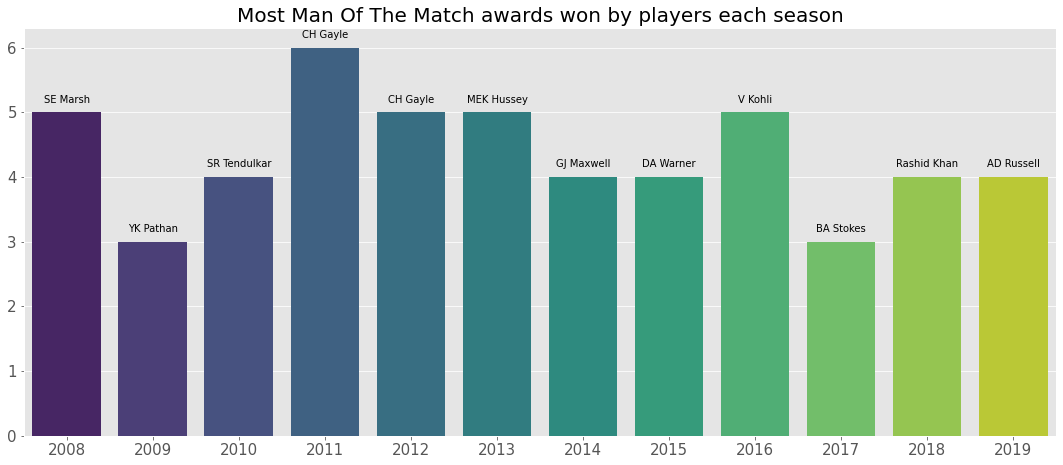

In [97]:
#season wise man of the match distribution
dic=defaultdict(list)
for i in range(0,len(match_data)):
    dic[match_data.season.iloc[i]].append(match_data.player_of_match.iloc[i])
player=[]
match=[]
year=[]
for i in sorted(dic.keys()):
    c=collections.Counter(dic[i])
    d={k: v for k, v in sorted(c.items(), key=lambda item: item[1],reverse=True)}
    player.append(list(d.keys())[0])
    match.append(list(d.values())[0])
    year.append(i)
plt.style.use('ggplot')
fig=plt.gcf()
fig.set_size_inches(18.5,7.5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Most Man Of The Match awards won by players each season", fontsize=20)
ax=sns.barplot(year, match, palette="viridis");
count=0
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 0.15,player[count],ha="center") 
    count+=1

####Analysis of Batsmen

In [104]:
# TOP Run scorers in IPL

top_run = pd.DataFrame(delivery_data.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10))
top_run.reset_index(inplace=True)
top_run.columns=['Batsman', 'Total runs']
top_run


,Batsman,Total runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


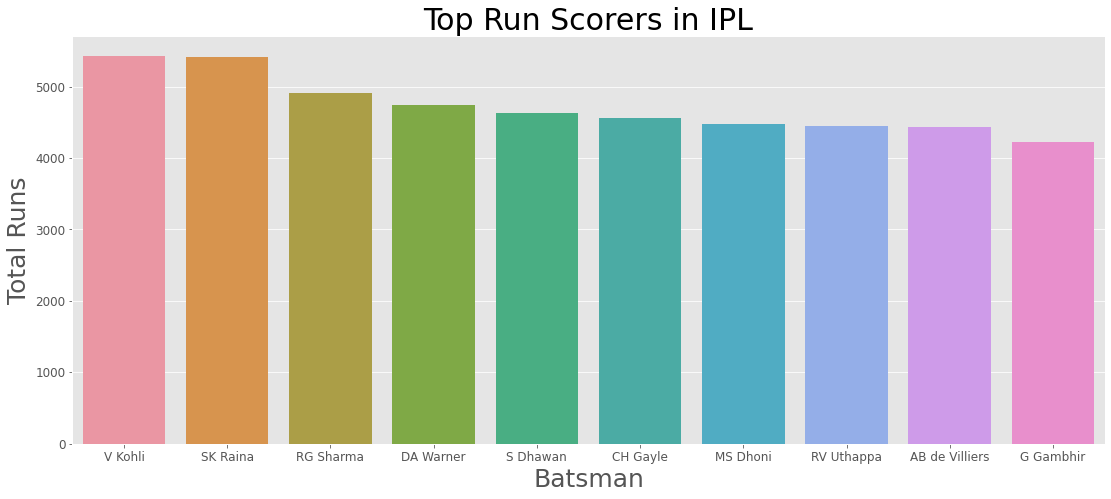

In [105]:
plt.style.use('ggplot')
fig=plt.gcf()
fig.set_size_inches(18.5,7.5)

ax=sns.barplot(x='Batsman',y='Total runs', data=top_run);

plt.title("Top Run Scorers in IPL", size=30)
plt.xlabel("Batsman", size = 25)
plt.ylabel("Total Runs", size=25)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

In [116]:
balls=delivery_data.groupby('batsman')['ball'].count().reset_index()
#balls
runs=delivery_data.groupby('batsman')['batsman_runs'].sum().reset_index()
#runs
four=delivery_data[delivery_data['batsman_runs']==4]
fours=four.groupby('batsman')['batsman_runs'].count().reset_index()
fours.columns=['batsman','4s']
#fours
six=delivery_data[delivery_data['batsman_runs']==6]
sixes=six.groupby('batsman')['batsman_runs'].count().reset_index()
sixes.columns=['batsman','6s']
#sixes
batsman=pd.concat([runs,balls.iloc[:,1],fours.iloc[:,1],sixes.iloc[:,1]],axis=1)
#batsman
batsman.fillna(0,inplace=True)
batsman['strike_rate']=(batsman['batsman_runs']/batsman['ball'])*100
batsman

,batsman,batsman_runs,ball,4s,6s,strike_rate
0,A Ashish Reddy,280,196,16.0,15.0,142.857143
1,A Chandila,4,7,7.0,1.0,57.142857
2,A Chopra,53,75,1.0,2.0,70.666667
3,A Choudhary,25,20,5.0,6.0,125.000000
4,A Dananjaya,4,5,13.0,5.0,80.000000
...,...,...,...,...,...,...
511,YV Takawale,192,183,0.0,0.0,104.918033
512,Yashpal Singh,47,67,0.0,0.0,70.149254
513,Younis Khan,3,7,0.0,0.0,42.857143
514,Yuvraj Singh,2765,2207,0.0,0.0,125.283190


####Highest individual run score


In [124]:
top_score=delivery_data.groupby(['match_id','batsman','batting_team'])['batsman_runs'].sum().reset_index().sort_values(by='batsman_runs',ascending=False).head(10)
top_score

,match_id,batsman,batting_team,batsman_runs
6200,411,CH Gayle,RCB,175
900,60,BB McCullum,KKR,158
8426,562,AB de Villiers,RCB,133
10149,7935,RR Pant,DC,130
9257,620,AB de Villiers,RCB,129
5585,372,CH Gayle,RCB,128
3135,206,M Vijay,CSK,127
529,36,DA Warner,SRH,126
7752,516,V Sehwag,KXIP,122
10417,7953,SR Watson,CSK,121


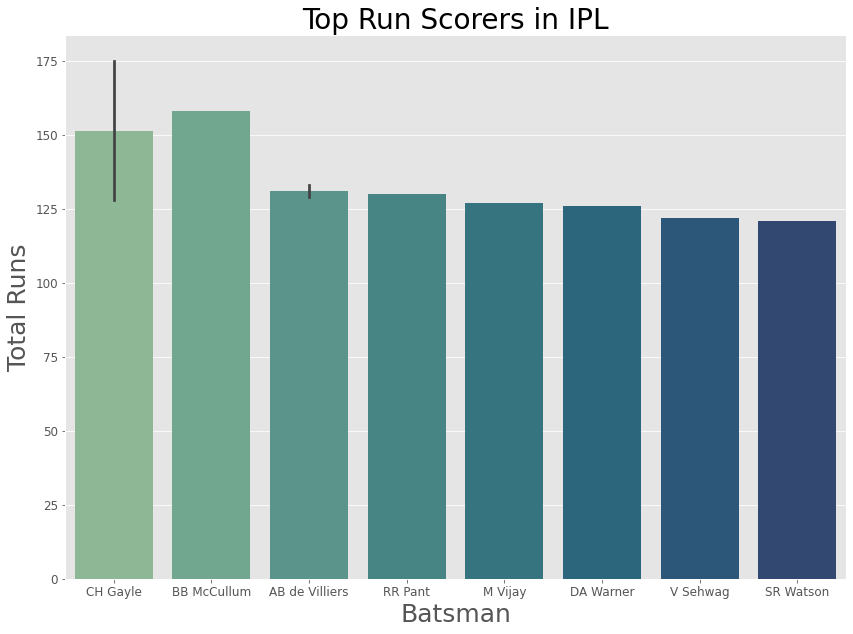

In [220]:
plt.style.use('ggplot')
fig=plt.gcf()
fig.set_size_inches(14,10)

sns.barplot(x='batsman',y='batsman_runs', data=top_score,palette="crest");

plt.title("Top Run Scorers in IPL", size=28)
plt.xlabel("Batsman", size = 25)
plt.ylabel("Total Runs", size=25)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

####Analysis of Bowlers

In [272]:
deli_copy['dismissal_kind'].unique()
#delivery_data
dismissal_kinds = ['caught', 'bowled', 'lbw', 'caught and bowled', 'stumped', 'hit wicket']
bowlers = deli_copy[deli_copy['dismissal_kind'].isin(dismissal_kinds)]
bowlers = deli_copy.groupby('bowler').apply(lambda x: x['dismissal_kind'].dropna().reset_index(name='wickets'))

b=pd.DataFrame(bowlers).reset_index()
b.drop(b[b['wickets']=="Not Out"].index, inplace =True)
b=b.set_index('bowler')
b

,level_1,index,wickets
bowler,,,
A Ashish Reddy,18,80497,bowled
A Ashish Reddy,23,80502,caught
A Ashish Reddy,42,81750,caught
A Ashish Reddy,67,82253,caught
A Ashish Reddy,79,83084,caught
...,...,...,...
Z Khan,2138,142480,caught
Z Khan,2143,143476,bowled
Z Khan,2174,144752,caught


In [268]:
bowlers_df = bowlers.groupby('bowler').count().reset_index()
top_bowlers= bowlers_df.sort_values(by='wickets', ascending=False)
top_bowlers_head=top_bowlers[top_bowlers.wickets>=40].head(10)
top_bowlers_head

,bowler,index,wickets
0,A Ashish Reddy,270,270
1,A Chandila,234,234
2,A Choudhary,108,108
3,A Dananjaya,25,25
4,A Flintoff,66,66
...,...,...,...
400,YA Abdulla,222,222
401,YK Pathan,1184,1184
402,YS Chahal,1841,1841
403,Yuvraj Singh,882,882


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Wicket count')

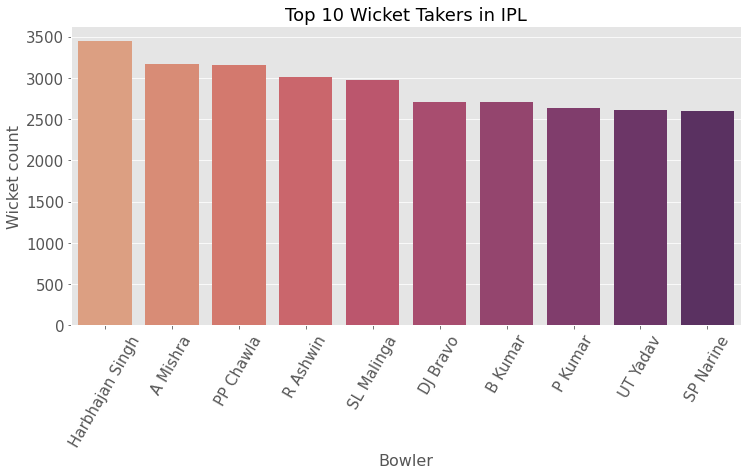

In [246]:
fig=plt.gcf()
fig.set_size_inches(12,5.5)
plt.xticks(fontsize=15, rotation=60)
plt.yticks(fontsize=15)
sns.barplot(top_bowlers_head['bowler'],top_bowlers['wickets'], palette="flare")
plt.title("Top 10 Wicket Takers in IPL", fontsize=18)
plt.xlabel("Bowler", size = 16)
plt.ylabel("Wicket count", size=16)

Harbhajan Singh, Amit Mishra, Piyush Chawla and R Ashwin are the top bowlers in IPL from 2008-2019 holding the most amount of wickets

###Factors contributing to Win/Loss of a team

####Pitch/Venue analysis

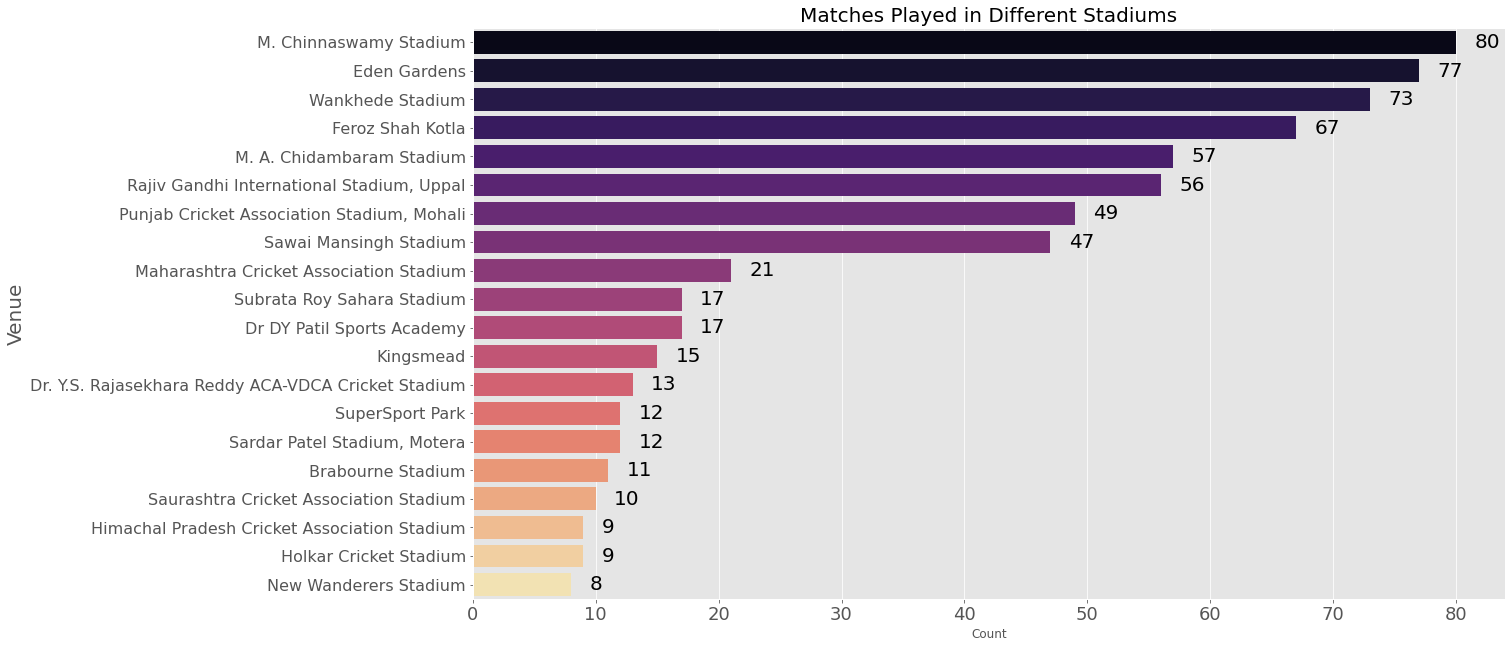

In [155]:
a = pd.DataFrame()
a['Count']=match_data['venue'].value_counts()
a['Venue'] =a.index
a=a[:20]
plt.style.use('ggplot')
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.ylabel("Venue", size=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.title("Matches Played in Different Stadiums",fontsize=20)
ax=sns.barplot(x='Count', y='Venue', data=a, palette="magma")
count=0

for i, v in enumerate(a['Count']):
    ax.text(v + 1.5, i, str(v),va="center", fontdict=dict(fontsize=20))


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


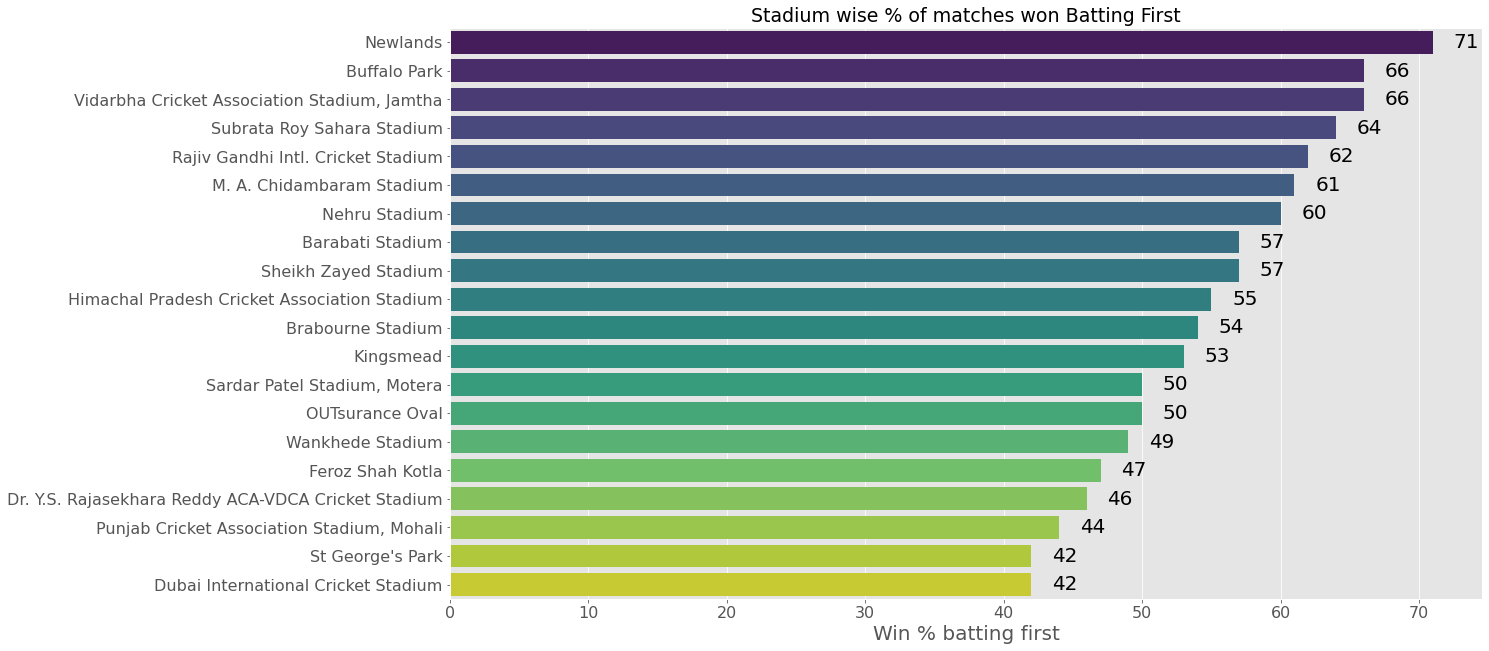

In [160]:
df = pd.DataFrame()
df1 = pd.DataFrame()
temp = []
temp.append(match_data['toss_winner'][match_data['toss_decision']=='bat'])
temp.append(match_data['team2'][(match_data['toss_decision']=='field') & (match_data['toss_winner'] == match_data['team1'])])
temp.append(match_data['team1'][(match_data['toss_decision']=='field') & (match_data['toss_winner'] == match_data['team2'])])

df = pd.DataFrame(pd.concat(temp))
df = df.sort_index()
df.columns = ['team']

indices = df[(df['team'] == match_data['winner'])&(df.index == match_data.index)].index

df1['venue'] = match_data['venue'].value_counts()
df1['win_count'] = match_data[match_data.index.isin(indices)]['venue'].value_counts()
df1['win_perc'] = 100 * df1['win_count']/df1['venue'] 
df1 = df1.sort_values(by = ['win_perc'],ascending = False)
df1 = df1[:20]
winPercent = df1['win_perc'].astype('int')
plt.style.use('ggplot')
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("Stadium wise % of matches won Batting First",fontsize=19)
ax=sns.barplot(winPercent[:20], df1[:20].index, palette="viridis")
plt.xlabel("Win % batting first", size=20)
count=0

for i, v in enumerate(winPercent):
    ax.text(v + 1.5, i, str(v),va="center", fontdict=dict(fontsize=20))


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


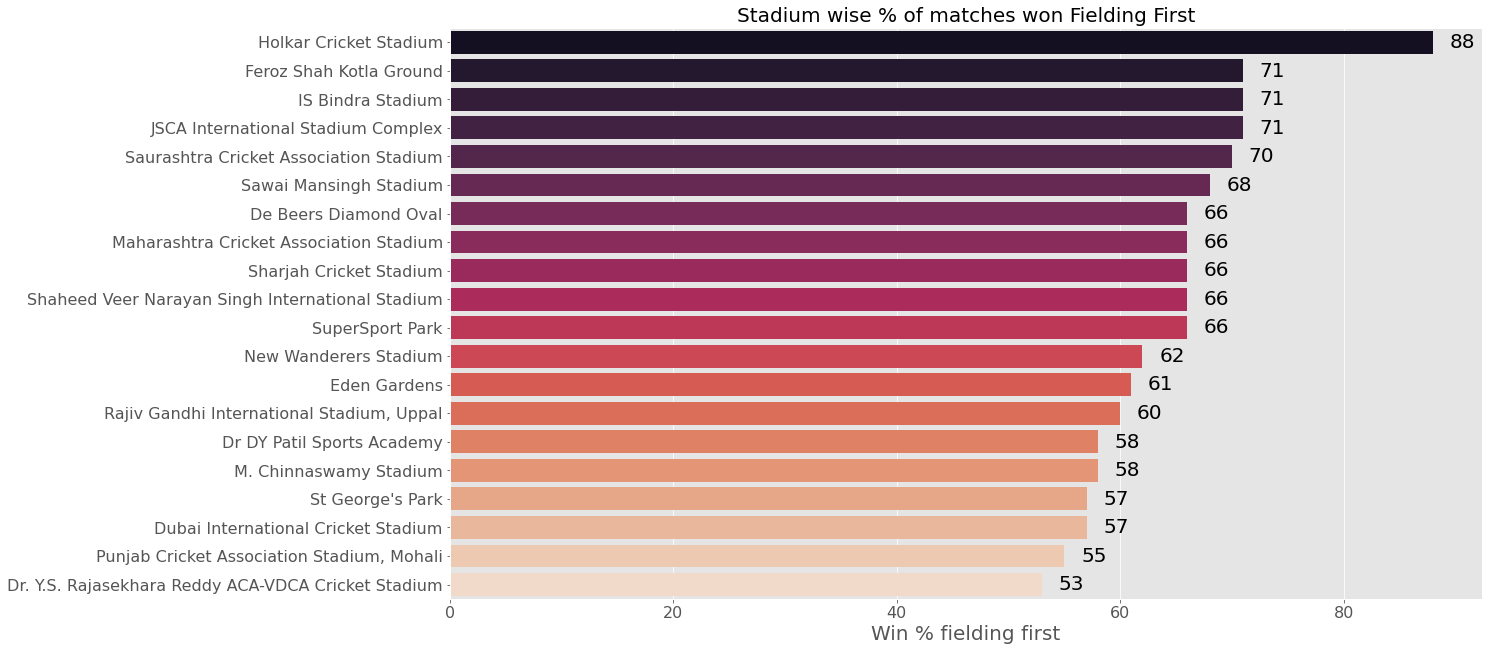

In [194]:
df1 = pd.DataFrame()
 
df1['venue'] = match_data['venue'].value_counts()
df1['win_count'] = match_data[match_data.index.isin(indices)]['venue'].value_counts()
df1['win_perc'] = 100 * df1['win_count']/df1['venue'] 
df1 = df1.sort_values(by = ['win_perc'])
df1['win_perc balling first'] = 100 - df1['win_perc']
df1 = df1[:20]
df1['win_perc balling first'] = df1['win_perc balling first'].astype('int')
plt.style.use('ggplot')
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("Stadium wise % of matches won Fielding First",fontsize=20)
ax=sns.barplot(df1['win_perc balling first'],df1.index,palette="rocket")
plt.xlabel("Win % fielding first", size=20)
count=0

for i, v in enumerate(df1['win_perc balling first']):
    ax.text(v + 1.5, i, str(v),va="center", fontdict=dict(fontsize=20))

####Toss Analysis

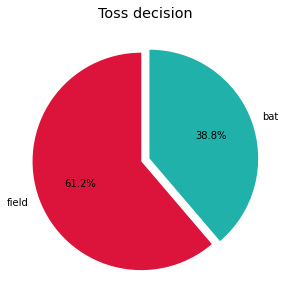

In [167]:
tmp = match_data.toss_decision.value_counts()
labels = (np.array(tmp.index))
sizes = (np.array((tmp / tmp.sum())*100))
fig = plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, colors=['crimson','lightseagreen'], explode=(0.04,0.04), autopct='%1.1f%%', startangle=90)
plt.title("Toss decision")
plt.show()


We observe majority of the teams choose to field over bat. Let's now check this trend over the seasons


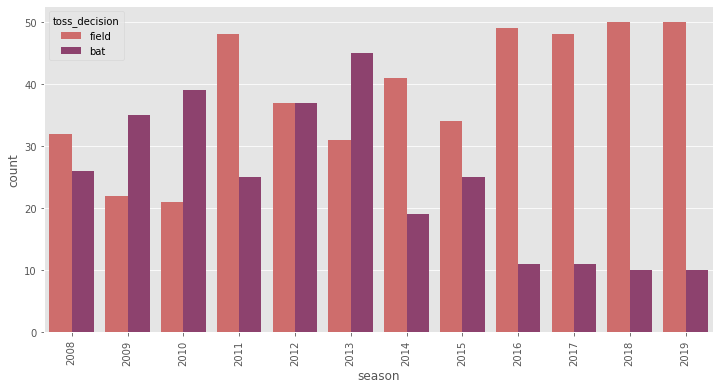

In [168]:
fig = plt.figure(figsize=(12,6))
sns.countplot(x='season', hue='toss_decision', data=match_data, palette="flare")
plt.xticks(rotation='vertical')
plt.show()

Most of the graph depicts that fielding first actually gives an upper edge to the team as the number of wins in this case was mostly higher.

Let's see if chooding to field first actually boosts your chance to win. For this we see if the winning team chose to field first.

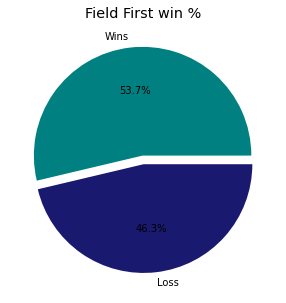

In [227]:
win = (match_data.win_by_wickets>0).sum()
lose = (match_data.win_by_wickets==0).sum()
labels = ["Wins", "Loss"]
total = float(win + lose)
sizes = [(win/total)*100, (lose/total)*100]
colors = ['teal', 'midnightblue']
fig = plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', explode=(0.04,0.04),  startangle=0)
plt.title("Field First win %")
plt.show()


We observe that the team to Field first mostly wins... but their chances of losing are almost the same, the difference in percentage being minute.

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


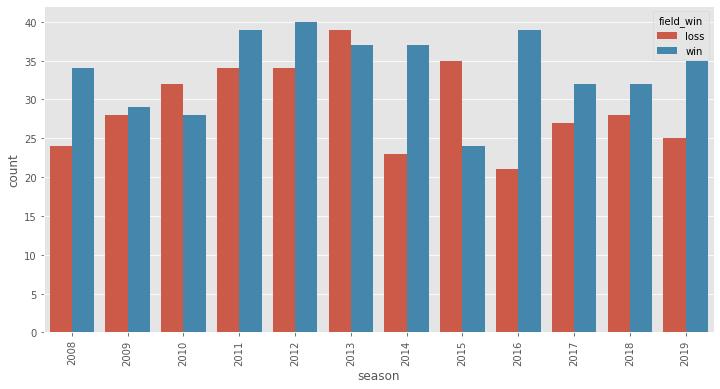

In [225]:
match_data["field_win"] = "win"
match_data["field_win"].iloc[match_data['win_by_wickets']==0] = "loss"
fig = plt.figure(figsize=(12,6))
sns.countplot(x='season', hue='field_win', data=match_data);
plt.xticks(rotation='vertical');
plt.show();

We see that the chances that the team fielding first wins is pretty higher than that of those batting first. 2010, 2013 and 2015 were exceptions to this.


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


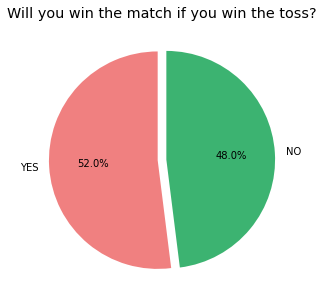

In [236]:
match_data['toss_winner_wins'] = 'NO'
df["col1"] = df["col1"].str.strip().str.lower()
match_data['toss_winner_wins'].iloc[match_data.toss_winner == match_data.winner] = 'YES'
temp_series = match_data.toss_winner_wins.value_counts()

labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
fig = plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, colors=['lightcoral', 'mediumseagreen'],autopct='%1.1f%%', explode=(0.04,0.04), startangle=90)
plt.title("Will you win the match if you win the toss?")
plt.show()

Let's look at the season wise distribution of the graph above.

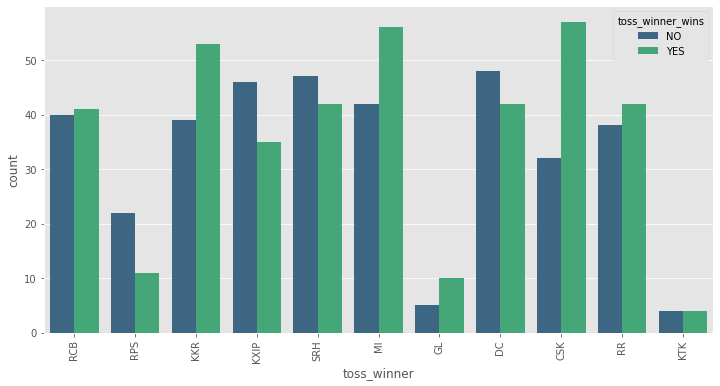

In [239]:
fig = plt.figure(figsize=(12,6))
sns.countplot(x='toss_winner', hue='toss_winner_wins', data=match_data,palette="viridis")
plt.xticks(rotation='vertical')
plt.show();

CSK and MI have the highest chances if winning if they win the toss. Nevertheless KXIP, SRH and DC have contradicted this observation